In [56]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np 
import pandas as pd 
import os

cwd = os.getcwd()
df = pd.read_csv(cwd + "/train.csv")

In [57]:
print(df.columns)
label_value_count = df.emotion.value_counts()
print(label_value_count)
print(df.info())

Index(['Unnamed: 0', 'image', 'emotion'], dtype='object')
HAPPINESS    2128
NEUTRAL      2038
SURPRISE       80
ANGER          67
SADNESS        36
DISGUST         4
Name: emotion, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4353 non-null   int64 
 1   image       4353 non-null   object
 2   emotion     4353 non-null   object
dtypes: int64(1), object(2)
memory usage: 102.1+ KB
None


In [58]:
# Convert string emotion to float
dictionary = {'emotion':{'HAPPINESS':0,'NEUTRAL':1, 'SURPRISE':2, 'ANGER':3, 'SADNESS':4, 'DISGUST':5}}
df.replace(dictionary, inplace = True)

X = df.loc[:, df.columns != 'emotion']
y = df.loc[:,'emotion']

In [59]:
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5, shuffle=False)

In [60]:
'''
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
'''

'\n# plot arrows\nfig1 = plt.figure(figsize=[12,12])\nax1 = fig1.add_subplot(111,aspect = \'equal\')\nax1.add_patch(\n    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color=\'green\',alpha = 0.5)\n    )\nax1.add_patch(\n    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color=\'red\',alpha = 0.5)\n    )\n\ntprs = []\naucs = []\nmean_fpr = np.linspace(0,1,100)\ni = 1\nfor train,test in cv.split(x,y):\n    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])\n    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])\n    tprs.append(interp(mean_fpr, fpr, tpr))\n    roc_auc = auc(fpr, tpr)\n    aucs.append(roc_auc)\n    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=\'ROC fold %d (AUC = %0.2f)\' % (i, roc_auc))\n    i= i+1\n\nplt.plot([0,1],[0,1],linestyle = \'--\',lw = 2,color = \'black\')\nmean_tpr = np.mean(tprs, axis=0)\nmean_auc = auc(mean_fpr, mean_tpr)\nplt.plot(mean_fpr, mean_tpr, color=\'blue\',\n         label=r\'Mean ROC (AUC = %0.2f )\' % (mean_auc),lw=2, alpha=1)

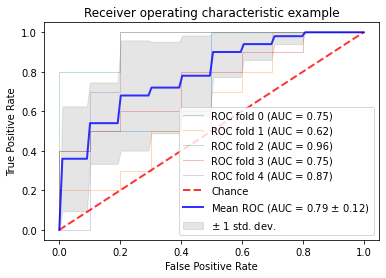

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# midle line
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [62]:
'''
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
'''

'\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("Receiver operating characteristic example")\n'